In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

from sklearn.preprocessing import StandardScaler
import hdbscan
import seaborn as sns
from matplotlib.colors import ListedColormap

In [ ]:
import sys
import os
project_root = os.path.dirname(os.getcwd())
if project_root not in sys.path:
    sys.path.insert(0, project_root)

from utils.display_plots import plot

## Load Data

In [2]:
data = pd.read_csv("~\.cache\kagglehub\datasets\waalbannyantudre\gene-expression-cancer-rna-seq-donated-on-682016\\versions\\1\data.csv")
labels = pd.read_csv("~\.cache\kagglehub\datasets\waalbannyantudre\gene-expression-cancer-rna-seq-donated-on-682016\\versions\\1\labels.csv")

<>:1: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:1: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
C:\Users\ayarmanco\AppData\Local\Temp\ipykernel_25364\923119767.py:1: SyntaxWarning: invalid escape sequence '\.'
  data = pd.read_csv("~\.cache\kagglehub\datasets\waalbannyantudre\gene-expression-cancer-rna-seq-donated-on-682016\\versions\\1\data.csv")
C:\Users\ayarmanco\AppData\Local\Temp\ipykernel_25364\923119767.py:2: SyntaxWarning: invalid escape sequence '\.'
  labels = pd.read_csv("~\.cache\kagglehub\datasets\waalbannyantudre\gene-expression-cancer-rna-seq-donated-on-682016\\versions\\1\labels.csv")


## Pre-Processing

In [3]:
data = data.rename(columns={"Unnamed: 0": "sample_id"})
labels = labels.rename(columns={"Unnamed: 0": "sample_id"})
genes = data.filter(regex="gene_")
scaler = StandardScaler()
scaled_data = scaler.fit_transform(genes)

## HDBSCAN Aplication

### Dimensionality Reduction With UMAP

In [4]:
import umap

reducer = umap.UMAP(n_neighbors=3, random_state=42)
embeddings = reducer.fit_transform(scaled_data)

c:\Users\ayarmanco\personalworkspace\kaggle_env\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\ayarmanco\personalworkspace\kaggle_env\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


### Original labels

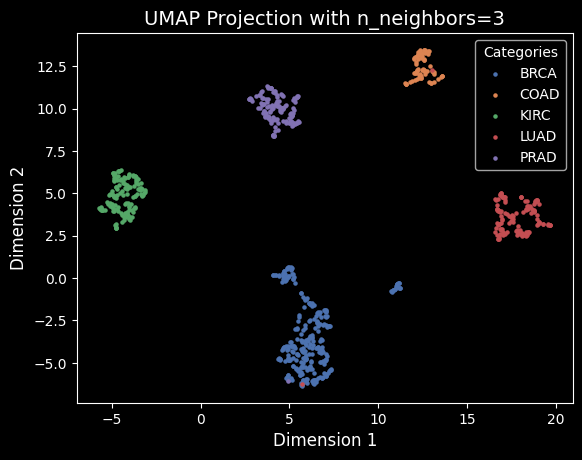

In [12]:
plot(embeddings, labels["Class"], 'UMAP Projection with n_neighbors=3')

### HDBSCAN Clustering

In [ ]:
def apply_hdbscan(embeddings, min_cluster_size, min_sample):
    # Create HDBSCAN clusterer
    clusterer = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size, min_samples=min_sample)

    # Train the model
    cluster_labels = clusterer.fit_predict(embeddings)
    silhouette = metrics.silhouette_score(embeddings, cluster_labels)
    davies_bouldin = metrics.davies_bouldin_score(embeddings, cluster_labels)
    calinski_harabasz = metrics.calinski_harabasz_score(embeddings, cluster_labels)

    n_clusters = len(set(cluster_labels)) - (1 if -1 in labels else 0)
    n_noise = list(cluster_labels).count(-1)

    print(f"""
    n_clusters: {n_clusters},
    n_noise: {n_noise},
    silhouette_score: {silhouette:.4f},
    davies_bouldin_score: {davies_bouldin:.4f},
    calinski_harabasz_score: {calinski_harabasz:.0f}
    """)

    return cluster_labels, clusterer, {'n_clusters': n_clusters, 'n_noise': n_noise, 'silhouette_score': silhouette, 'davies_bouldin_score': davies_bouldin, 'calinski_harabasz_score': calinski_harabasz}

c:\Users\ayarmanco\personalworkspace\kaggle_env\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ayarmanco\personalworkspace\kaggle_env\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



    n_clusters: 6,
    n_noise: 0,
    silhouette_score: 0.7554,
    davies_bouldin_score: 0.2551,
    calinski_harabasz_score: 5543
    


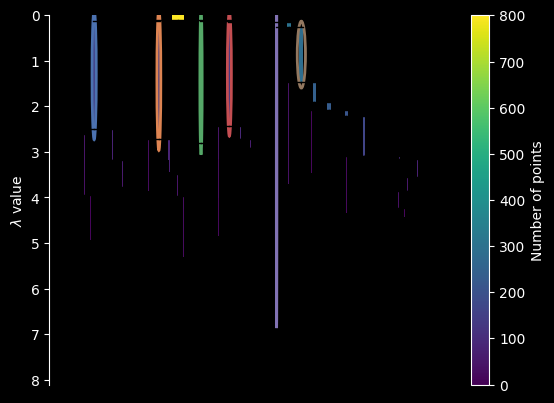

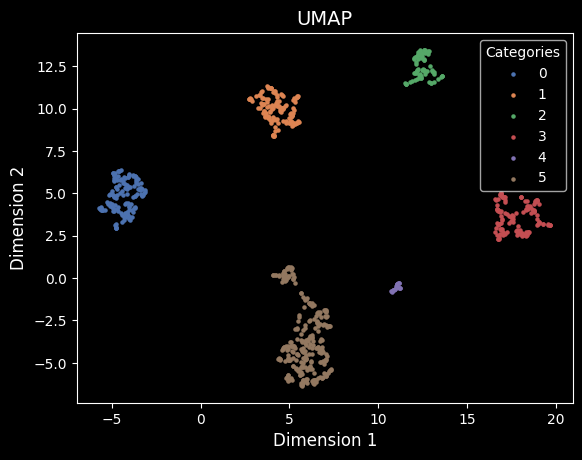

In [38]:
labels1, clusterer1, metrics1 = apply_hdbscan(embeddings, min_cluster_size=10, min_sample=5)
clusterer1.condensed_tree_.plot(select_clusters=True,
                            selection_palette=sns.color_palette('deep', 8))
clusterer1.condensed_tree_.to_pandas().head()
plt.figure()
plot(embeddings, labels=labels1, title='UMAP')

c:\Users\ayarmanco\personalworkspace\kaggle_env\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ayarmanco\personalworkspace\kaggle_env\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



    n_clusters: 5,
    n_noise: 0,
    silhouette_score: 0.8144,
    davies_bouldin_score: 0.2298,
    calinski_harabasz_score: 5112
    


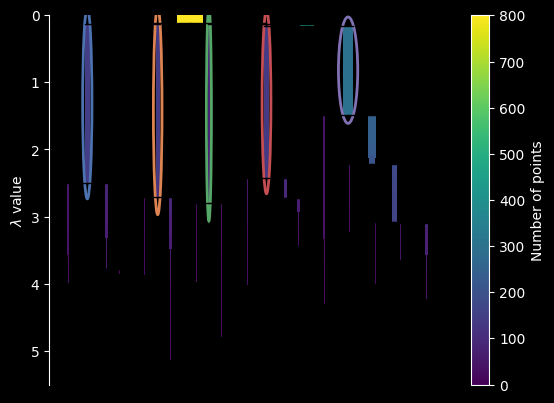

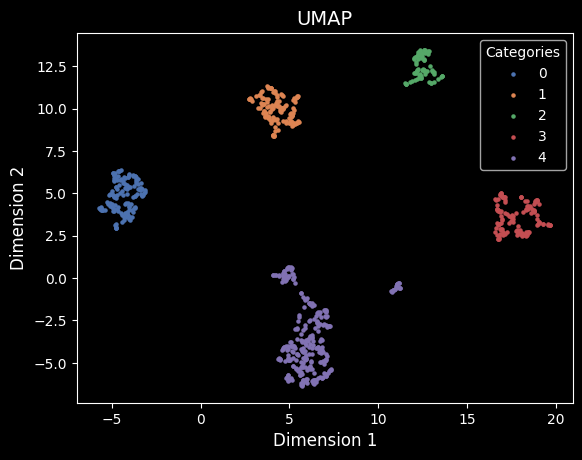

In [41]:
labels2, clusterer2, metrics2 = apply_hdbscan(embeddings, min_cluster_size=20, min_sample=5)
clusterer2.condensed_tree_.plot(select_clusters=True,
                            selection_palette=sns.color_palette('deep', 8))
clusterer2.condensed_tree_.to_pandas().head()
plt.figure()
plot(embeddings, labels=labels2, title='UMAP')

c:\Users\ayarmanco\personalworkspace\kaggle_env\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ayarmanco\personalworkspace\kaggle_env\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



    n_clusters: 5,
    n_noise: 0,
    silhouette_score: 0.8144,
    davies_bouldin_score: 0.2298,
    calinski_harabasz_score: 5112
    


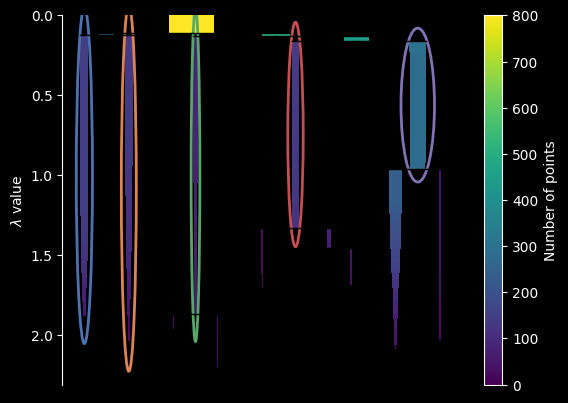

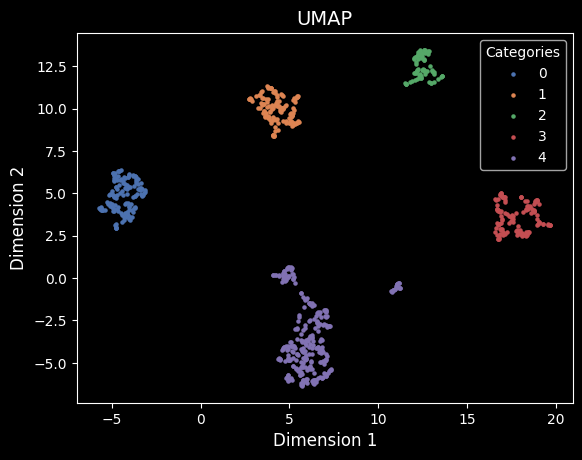

In [42]:
labels3, clusterer3, metrics3 = apply_hdbscan(embeddings, min_cluster_size=20, min_sample=20)
clusterer3.condensed_tree_.plot(select_clusters=True,
                            selection_palette=sns.color_palette('deep', 8))
clusterer3.condensed_tree_.to_pandas().head()
plt.figure()
plot(embeddings, labels=labels3, title='UMAP')

c:\Users\ayarmanco\personalworkspace\kaggle_env\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ayarmanco\personalworkspace\kaggle_env\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



    n_clusters: 5,
    n_noise: 0,
    silhouette_score: 0.8144,
    davies_bouldin_score: 0.2298,
    calinski_harabasz_score: 5112
    


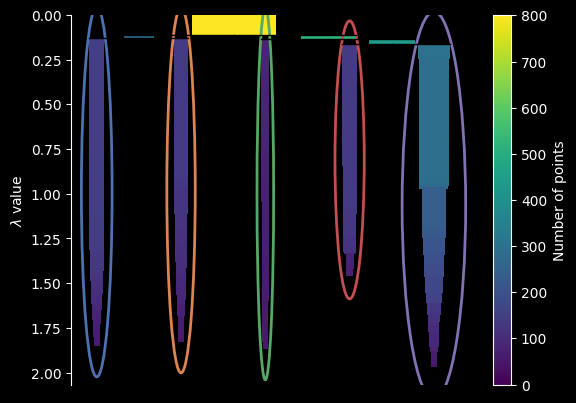

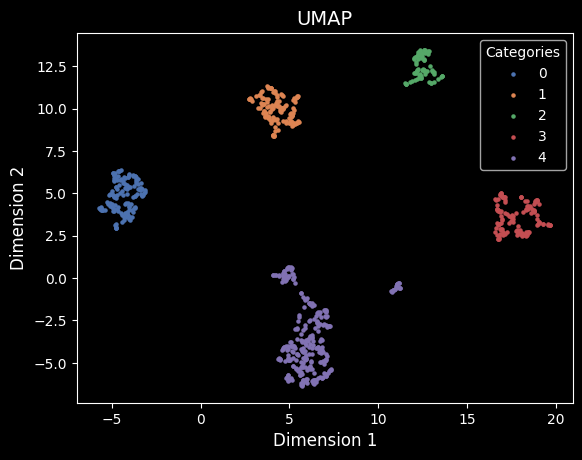

In [43]:
labels4, clusterer4, metrics4 = apply_hdbscan(embeddings, min_cluster_size=50, min_sample=20)
clusterer4.condensed_tree_.plot(select_clusters=True,
                            selection_palette=sns.color_palette('deep', 8))
clusterer4.condensed_tree_.to_pandas().head()
plt.figure()
plot(embeddings, labels=labels4, title='UMAP')


    n_clusters: 3,
    n_noise: 146,
    silhouette_score: 0.5603,
    davies_bouldin_score: 0.7144,
    calinski_harabasz_score: 734
    


c:\Users\ayarmanco\personalworkspace\kaggle_env\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ayarmanco\personalworkspace\kaggle_env\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


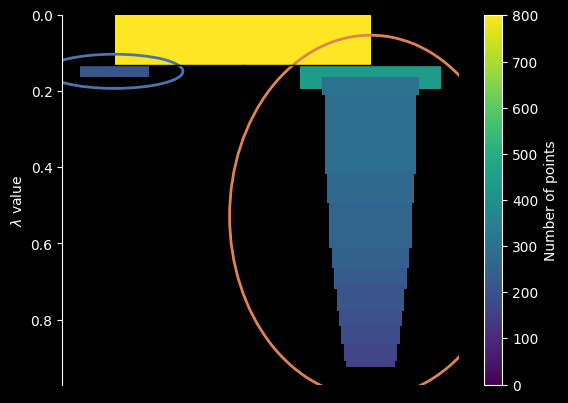

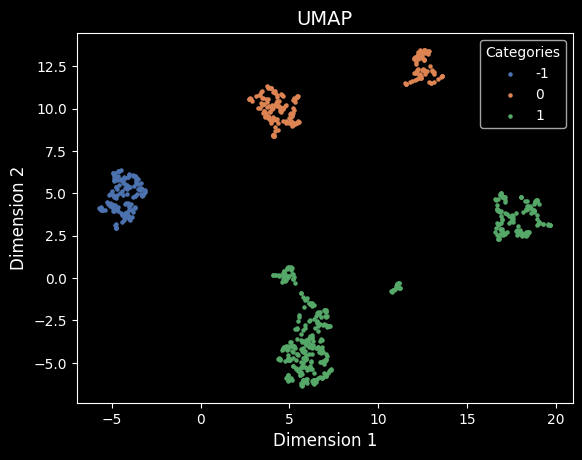

In [50]:
labels5, clusterer5, metrics5 = apply_hdbscan(embeddings, min_cluster_size=150, min_sample=50)
clusterer5.condensed_tree_.plot(select_clusters=True,
                            selection_palette=sns.color_palette('deep', 8))
clusterer5.condensed_tree_.to_pandas().head()
plt.figure()
plot(embeddings, labels=labels5, title='UMAP')